In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings
warnings.simplefilter("ignore")

In [2]:
data_df1 = pd.read_csv("reddit_wsb.csv")
data_df2 = pd.read_csv("early_reddit_wsb.csv") 

In [3]:
data_df = pd.concat([data_df2, data_df1], axis = "rows", join = "inner")

In [4]:
data_df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,BB Gang you failed me! #WRECKED,1,ky5z6y,NaN,2,1.610751e+09,NaN,2021-01-15 17:50:10
1,I’m doing my part in GME. Going to HODL my way...,1,ky5yvy,NaN,0,1.610751e+09,NaN,2021-01-15 17:49:43
2,ZOM @ $40 by next week,1,ky5ymq,NaN,0,1.610751e+09,NaN,2021-01-15 17:49:19
3,the short sellers must learn,1,ky5y3x,NaN,0,1.610751e+09,NaN,2021-01-15 17:48:33
4,Boomer Buffet reveals $SSP as secret position,1,ky5xey,NaN,2,1.610751e+09,NaN,2021-01-15 17:47:36


In [5]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "fuck", "fucking"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

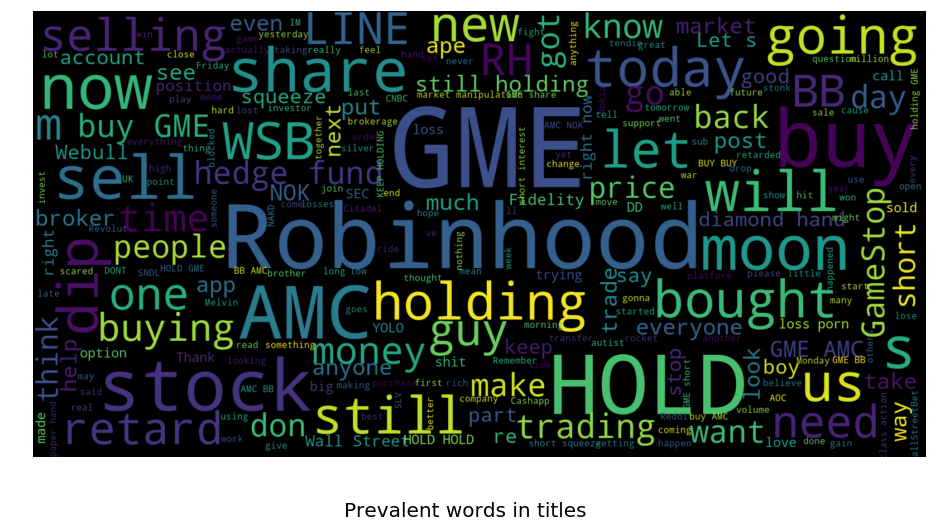

In [6]:
show_wordcloud(data_df['title'], title = 'Prevalent words in titles')

In [7]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"     
    
def sentiment_to_int(x):
    if(x=="Positive"):
        return 1
    elif(x=="Negative"):
        return -1
    else:
        return 0


In [8]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

In [9]:
data_df['date'] = pd.to_datetime(data_df["timestamp"]).dt.date

In [10]:
data_df['title_sentiment'] = data_df['title'].apply(lambda x: find_sentiment(x))
data_df['sentiment_int']   = data_df['title_sentiment'].apply(lambda x: sentiment_to_int(x))
#plot_sentiment(data_df, 'title_sentiment', 'Title')

In [11]:
data_df.head()

,title,score,id,url,comms_num,created,body,timestamp,date,title_sentiment,sentiment_int
0,BB Gang you failed me! #WRECKED,1,ky5z6y,NaN,2,1.610751e+09,NaN,2021-01-15 17:50:10,2021-01-15,Negative,-1
1,I’m doing my part in GME. Going to HODL my way...,1,ky5yvy,NaN,0,1.610751e+09,NaN,2021-01-15 17:49:43,2021-01-15,Neutral,0
2,ZOM @ $40 by next week,1,ky5ymq,NaN,0,1.610751e+09,NaN,2021-01-15 17:49:19,2021-01-15,Neutral,0
3,the short sellers must learn,1,ky5y3x,NaN,0,1.610751e+09,NaN,2021-01-15 17:48:33,2021-01-15,Neutral,0
4,Boomer Buffet reveals $SSP as secret position,1,ky5xey,NaN,2,1.610751e+09,NaN,2021-01-15 17:47:36,2021-01-15,Neutral,0


In [12]:
sentiment_ints = pd.DataFrame(data_df.groupby("date").mean()['sentiment_int'])

In [13]:
data_df.groupby("date").count()

,title,score,id,url,comms_num,created,body,timestamp,title_sentiment,sentiment_int
date,,,,,,,,,,
2021-01-15,100,100,100,0,100,100,5,100,100,100
2021-01-16,100,100,100,0,100,100,12,100,100,100
2021-01-17,100,100,100,0,100,100,21,100,100,100
2021-01-18,100,100,100,0,100,100,25,100,100,100
2021-01-19,100,100,100,0,100,100,11,100,100,100
2021-01-20,100,100,100,0,100,100,6,100,100,100
2021-01-21,100,100,100,0,100,100,10,100,100,100
2021-01-22,100,100,100,0,100,100,20,100,100,100
2021-01-23,100,100,100,0,100,100,8,100,100,100


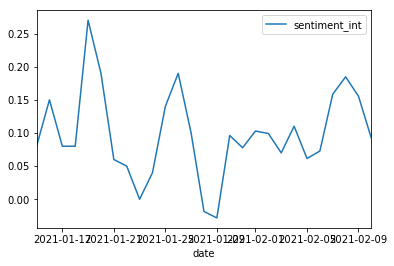

In [14]:
sentiment_ints.plot()

In [15]:
gme_prices = pd.read_csv("gme_prices.csv", infer_datetime_format=False, index_col = "date")

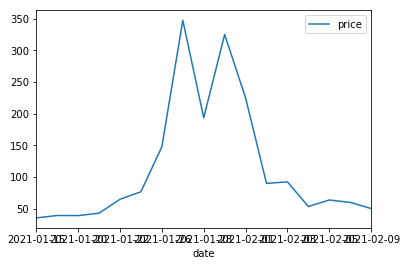

In [16]:
gme_prices.plot()

In [17]:
gme_prices["daily_chg"] = gme_prices["price"].pct_change().dropna()

In [18]:
gme_prices

,price,daily_chg
date,,
2021-01-15,35.50,NaN
2021-01-19,39.36,0.108732
2021-01-20,39.12,-0.006098
2021-01-21,43.03,0.099949
2021-01-22,65.01,0.510806
2021-01-25,76.79,0.181203
2021-01-26,147.98,0.927074
2021-01-27,347.51,1.348358
2021-01-28,193.60,-0.442894
